Results for polynomial of degree:  2 

Mean values: 

[-0.19095211 -0.10239592 -0.01249627  0.07874685  0.17133344  0.2652635
  0.36053703  0.45715402  0.55511449  0.65441842  0.75506583  0.8570567
  0.96039104  1.06506885  1.17109013  1.27845488  1.38716309  1.49721478
  1.60860993  1.72134856]


Variance values: 

[0.03320466 0.02244828 0.01571982 0.01200252 0.01041089 0.01019073
 0.01071915 0.01150455 0.01218661 0.01253632 0.01245595 0.01197908
 0.01127055 0.01062652 0.01047445 0.01137307 0.01401242 0.01921382
 0.02792989 0.04124454]




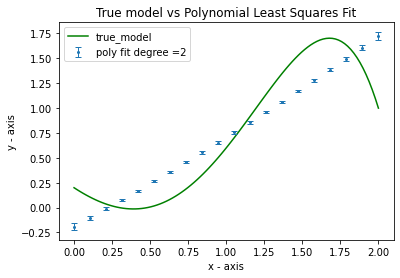



Results for polynomial of degree:  10 

Mean values: 

[2.03156576e-01 7.10802727e-02 3.50720769e-02 1.39397862e-02
 9.40290356e-04 1.61602660e-02 7.74674531e-02 1.88924935e-01
 3.41776132e-01 5.21686695e-01 7.16333968e-01 9.19127906e-01
 1.12729221e+00 1.33519366e+00 1.52614393e+00 1.66737479e+00
 1.71296642e+00 1.61765365e+00 1.36010779e+00 9.66956158e-01]


Variance values: 

[0.07556795 0.09662142 0.05056878 0.05049899 0.0370137  0.03681568
 0.03870544 0.03147485 0.02623066 0.02333407 0.02405037 0.03071981
 0.03352889 0.03404088 0.04054818 0.0413602  0.04378126 0.04003679
 0.10594195 0.1026151 ]




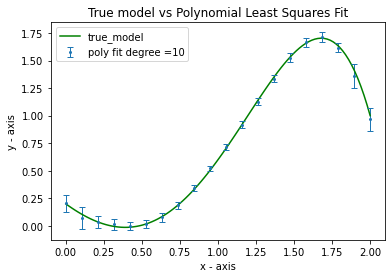

In [51]:
#  Assignment 1 - ii - Least Squares Regression

# importing the required modules 
import matplotlib.pyplot as plt 
import numpy as np
import math

def get_y_train(t0, t1, t2, t3, t4, t5, mu, variance, N, x):

  noise = np.random.normal(mu,math.sqrt(variance), size=(N,))
  y = t5*x**5 + t4*x**4 + t3*x**3 + t2*x**2 + t1*x + t0 + noise

  return (y)

def get_y_est(poly_deg, x_train, y_train, N):

  Q_train = np.zeros(shape = (N,poly_deg+1))
  Q_train[:, -1] = 1

  for i in range(0,poly_deg):
    Q_train[:,i] = np.power(x_train,i+1)

  theta = np.linalg.pinv(Q_train.T.dot(Q_train)).dot(Q_train.T).dot(y_train)
  y_est = Q_train.dot(theta)
  return (y_est)

def plot_pol_est_result(pol_deg, N, x_t, exp_num, t0, t1, t2, t3, t4, t5, mean, sigma):
  experiments = [] # list gathering the results for each experiment
  for i in range(0,exp_num):
    y_train = get_y_train(t0, t1, t2, t3, t4, t5, mean, sigma, N, x_t) # acquire train data for each experiment

    experiments.append(get_y_est(pol_deg, x_t, y_train, N)) # append estimates for experiment

  ##### Expected Value calculation
  E_Y = np.zeros(N)
  for i in range(0, exp_num):
    E_Y = E_Y + experiments[i]

  E_Y = E_Y / exp_num

  print('Results for polynomial of degree: ', pol_deg, '\n')
  print('Mean values: \n')
  print(E_Y)
  print('\n')

  ##### Variance calculation 
  var_Y = np.zeros(N)
  for i in range(0, exp_num):
    var_Y = var_Y + (experiments[i] - E_Y)**2

  var_Y = var_Y / exp_num

  print('Variance values: \n')
  print(var_Y)
  print('\n')

  x_true = np.linspace(0, 2, 100)
  y_true = th5*x_true**5 + th3*x_true**3 + th2*x_true**2 + th1*x_true + th0

  plt.plot(x_true, y_true, '-g', label= 'true_model')

  plt.errorbar(x_t, E_Y, marker='o', markersize='2', linewidth=0, yerr= var_Y, elinewidth = 1, capsize = 5, label='poly fit degree =' + str(pol_deg))

  # naming the x axis 
  plt.xlabel('x - axis') 
  # naming the y axis 
  plt.ylabel('y - axis') 

  # giving a title to my graph 
  plt.title('True model vs Polynomial Least Squares Fit') 

  # function to show the plot 
  plt.legend()

  plt.show()

#
th0 = 0.2
th1 = -1
th2 = 0.9
th3 = 0.7
th5 = -0.2

#data range
r_start = 0
r_end = 2
points  = 20
experiments_number = 100
noise_mean = 0
noise_sigma = 0.1
x_train = np.linspace(r_start, r_end, num= points)

plot_pol_est_result(2, points, x_train, experiments_number, th0, th1, th2, th3, 0, th5, noise_mean, noise_sigma)
print('\n')
plot_pol_est_result(10, points, x_train, experiments_number, th0, th1, th2, th3, 0, th5, noise_mean, noise_sigma)